## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings("ignore")

## Read news articlec csv 

In [2]:
df = pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Create embeddings of documents using  Sentence Transformer

In [30]:
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2', device = 'cuda')
embeddings = model.encode(df['Text'].to_list(), show_progress_bar = True, device = 'cuda')

Batches:   0%|          | 0/47 [00:00<?, ?it/s]

In [36]:
# A 384 long vector has been created by SentenceTransformer for each document
embeddings.shape

(1490, 384)

## Visualize the embeddings in 2D space using tSNE 

In [55]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components = 2, metric = 'cosine', n_jobs = -1).fit_transform(embeddings)

In [56]:
X_embedded.shape

(1490, 2)

<AxesSubplot:>

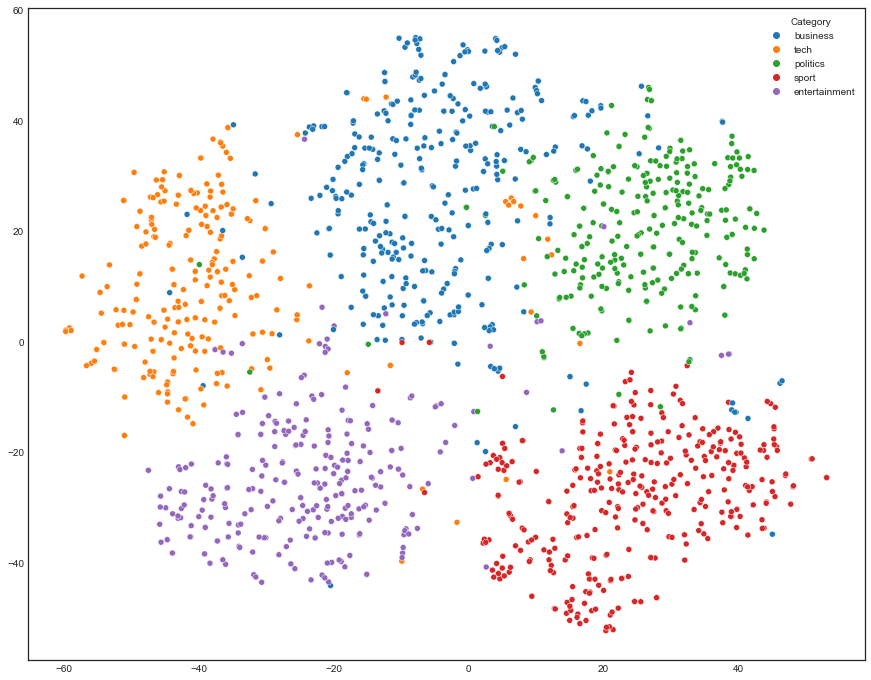

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.figure(figsize = (15, 12))
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], hue = df['Category'])

# We can see that the documents are nicely clustered

## fit sklearn NearestNeighbors using cosine metric to create vector database

In [59]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 5, metric = 'cosine', n_jobs = -1)
neighbors.fit(embeddings)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [60]:
# Function to summarize a document into 3 sentences using sumy library

def summarize(para, sentence_count = 3): 
    from sumy.parsers.plaintext import PlaintextParser
    from sumy.nlp.tokenizers import Tokenizer
    from sumy.summarizers.lsa import LsaSummarizer as Summarizer
    from sumy.nlp.stemmers import Stemmer
    from sumy.utils import get_stop_words

    LANGUAGE = 'english'
    SENTENCES_COUNT = sentence_count

    parser = PlaintextParser.from_string(para, Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(str(sentence).capitalize())

## Retrieve 4 closest articles for a given news article by sorting with cosine similarity

In [126]:
def random_example():    
    i = np.random.randint(1, len(df))
    summarize(df.loc[i, 'Text'], sentence_count = 3)
    print(df['Category'][i], end = '\n\n\n')
    print('\t\t\t\t\t\t\t\t News Recommendations', end = '\n\n')

    distances, indices = neighbors.kneighbors(model.encode(df['Text'][i], device = 'cuda').reshape(1, -1))

    for ind in indices[0][1:]:
        summarize(df.loc[ind, 'Text'], sentence_count = 3)
        print('--------------------------------------------------', end = '\n\n')

In [127]:
random_example()

Following the fascination with the writing of salam pax - not his real name - he began a regular column in the guardian newspaper and was given a crash course in documentary film-making.
For the film he travelled iraq to document the changing landscape of the country and the problems it has faced since the invasion  speaking to ordinary iraqis about their experiences.
Rasheed said the title was refers to the isolation felt by iraqis under saddam s regime and the difficult time the country is now experiencing.
entertainment


								 News Recommendations

Submission was made with liberal somali-dutch politician ayaan hirsi ali and was due to be shown on 30 january.
The festival opens with the french film the 10th district court  moments of trials made by raymond depardon.
The event sees 14 films competing to win three top tiger awards which aim to introduce promising new talent.
--------------------------------------------------

Many dutch people have questioned their country s self-i